In [20]:
import torch
from torchvision import datasets, transforms
torch.cuda.is_available()
from PIL import Image

In [21]:
import util.model_rpp
model=util.model_rpp.efficientnet_b1_rpp(pretrained=True, cut_at_pooling=False,
                    num_features=256, norm=False, dropout=0.5, num_classes=2, 
                    FCN=True, T=1., dim=256)

/data/jong980812/project/mae/util/model_rpp.py:234: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(self.local_conv.weight, mode= 'fan_out')
/data/jong980812/project/mae/util/model_rpp.py:237: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(self.feat_bn2d.weight,1) #initialize BN, may not be used
/data/jong980812/project/mae/util/model_rpp.py:238: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(self.feat_bn2d.bias,0) # iniitialize BN, may not be used
/data/jong980812/project/mae/util/model_rpp.py:242: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(self.instance0.weight, std=0.001)
/data/jong980812/project/mae/util/model_rpp.py:243: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(self.instance0.bias, 0)
/data/jong980812/project/mae/util/model_

In [22]:

finetune_path='/data/jong980812/project/mae/result_new/efficient_b1/only_pcb/bs2_lr2_909/final/OUT/05/checkpoint-7.pth'
checkpoint=torch.load(finetune_path,map_location='cpu')
model.load_state_dict(checkpoint['model'],strict=False)
model=model.to('cuda')

In [41]:
img_path='/local_datasets/asd/compact_crop_trimmed_2/05/val/ASD/A11-002-002.jpg'
transform=transforms.Compose([
                transforms.Resize((384,128)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.96, 0.96, 0.96],
                                        std=[0.1, 0.1, 0.1])
                ])
sample=Image.open(img_path)#pillow객체
sample=transform(sample)
sample=sample.to('cuda')



In [42]:
_,_,local_mask=model(sample.unsqueeze(0))

/data/jong980812/project/mae/util/model_rpp.py:325: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  local_mask = F.softmax(T*local_mask)   #using softmax mode


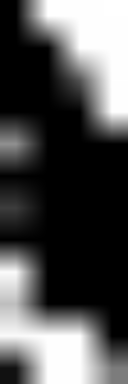

In [43]:
mask_0=local_mask[0][0]
topil=transforms.ToPILImage()
# mask_0_pil=topil(mask_0)
resize = transforms.Resize((384,128))
mask_0_resized = resize(mask_0.unsqueeze(0))
topil(mask_0_resized)

mask_1=local_mask[0][1]
topil=transforms.ToPILImage()
# mask_0_pil=topil(mask_0)
resize = transforms.Resize((384,128))
mask_1_resized = resize(mask_1.unsqueeze(0))
topil(mask_1_resized)

mask_2=local_mask[0][2]
topil=transforms.ToPILImage()
# mask_0_pil=topil(mask_0)
resize = transforms.Resize((384,128))
mask_2_resized = resize(mask_2.unsqueeze(0))
topil(mask_2_resized)


In [44]:
transform_2=transforms.Compose([
                transforms.Resize((384,128)),
                transforms.ToTensor()])
sample_2=Image.open(img_path)#pillow객체
sample_2=transform_2(sample_2)

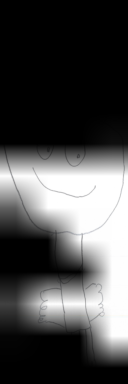

In [45]:
topil(sample_2*mask_0_resized.detach().cpu())

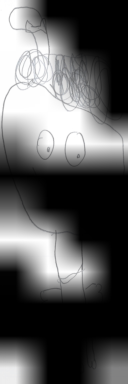

In [46]:
topil(sample_2*mask_1_resized.detach().cpu())

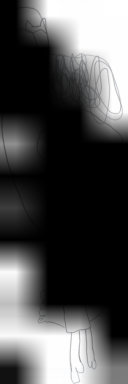

In [47]:
topil(sample_2*mask_2_resized.detach().cpu())

In [30]:
mask_0

tensor([[9.7645e-38, 3.6886e-13, 1.3951e-05, 1.1799e-17],
        [3.5442e-04, 5.7148e-34, 0.0000e+00, 1.6317e-03],
        [1.1757e-03, 1.4661e-05, 4.6309e-38, 9.3471e-01],
        [2.5819e-03, 1.0000e+00, 1.0000e+00, 1.0000e+00],
        [1.5907e-04, 6.1257e-01, 1.0000e+00, 1.0000e+00],
        [4.4113e-02, 5.5680e-09, 1.3017e-01, 1.0000e+00],
        [1.6982e-01, 3.6683e-05, 3.1449e-03, 9.7307e-01],
        [9.0186e-07, 1.9028e-02, 6.9126e-01, 1.0000e+00],
        [8.3564e-34, 6.4348e-01, 2.3428e-04, 1.0000e+00],
        [2.4668e-34, 5.9363e-19, 1.6862e-18, 3.2053e-01],
        [7.8795e-12, 5.4120e-30, 0.0000e+00, 1.7726e-13],
        [6.5568e-22, 2.2428e-07, 2.0227e-08, 2.1472e-27]], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [31]:
img_path_='/local_datasets/tu_berlin/01/train/ant/243.png'
sample=Image.open(img_path_)
transform=transforms.ToTensor()
transform(sample).shape


FileNotFoundError: [Errno 2] No such file or directory: '/local_datasets/tu_berlin/01/train/ant/243.png'

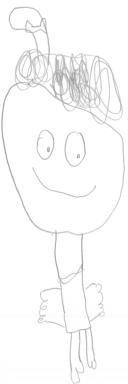

In [40]:
img_path='/local_datasets/asd/compact_crop_trimmed_2/05/val/ASD/A11-002-002.jpg'
transform=transforms.Compose([
                transforms.Resize((384,128)),
                transforms.Grayscale(1),
                transforms.ToTensor(),
                # transforms.Normalize(mean=[0.96],
                #                         std=[0.1])
                ])
sample=Image.open(img_path)#pillow객체
sample=transform(sample)
topil=transforms.ToPILImage()
topil(sample)

